# Grafos

Nós anômalos com base no valor total das transações: []


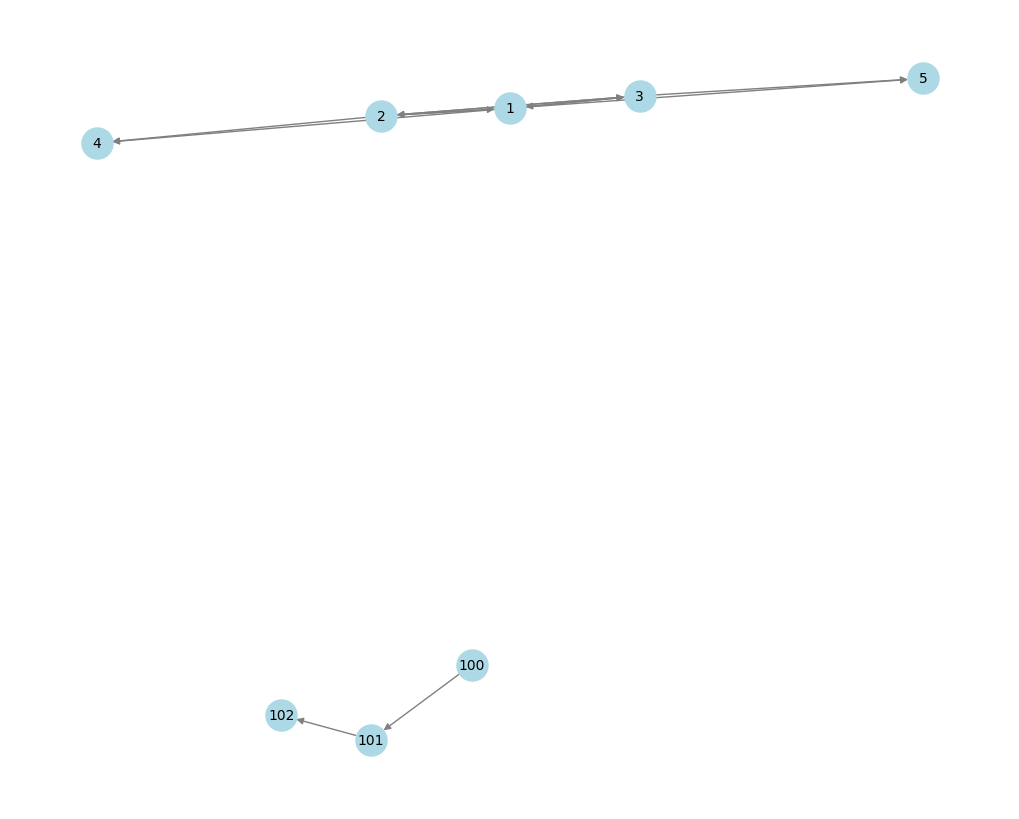

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exemplo de dados de transações financeiras
data = {
    'sender_id': [1, 2, 3, 1, 3, 2, 1, 1, 3, 2, 100, 101],
    'receiver_id': [2, 3, 1, 3, 2, 1, 4, 5, 5, 4, 101, 102],
    'amount': [50, 20, 30, 40, 10, 60, 100, 200, 300, 5000, 500, 7000],
    'timestamp': pd.to_datetime(['2024-09-01 10:00:00', '2024-09-01 11:00:00', '2024-09-01 12:00:00',
                                 '2024-09-02 09:00:00', '2024-09-02 10:00:00', '2024-09-02 11:00:00',
                                 '2024-09-03 10:00:00', '2024-09-03 11:00:00', '2024-09-03 12:00:00',
                                 '2024-09-03 13:00:00', '2024-09-04 10:00:00', '2024-09-04 11:00:00'])
}

# Criando um DataFrame
df = pd.DataFrame(data)

# Construindo o grafo das transações
G = nx.from_pandas_edgelist(df, 'sender_id', 'receiver_id', ['amount', 'timestamp'], create_using=nx.DiGraph())

# Calculando o valor total das transações para cada nó (usuário)
total_transaction_values = dict(G.degree(weight='amount'))

# Calculando a média e desvio padrão das transações
avg_transaction_value = np.mean(list(total_transaction_values.values()))
std_transaction_value = np.std(list(total_transaction_values.values()))

# Identificando nós anômalos com base no valor total das transações
anomalous_nodes = [node for node, total in total_transaction_values.items() if total > avg_transaction_value + 2 * std_transaction_value]

print(f"Nós anômalos com base no valor total das transações: {anomalous_nodes}")

# Visualizando o grafo e destacando os nós anômalos
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
nx.draw_networkx_nodes(G, pos, nodelist=anomalous_nodes, node_color='red')
plt.show()
